## Ánalise da dados de saúde mental

#### Carregando e combinando os dados

In [18]:
import pandas as pd
import os

# Caminho para a pasta com os arquivos CSV
data_path = "../data"

# Listando todos os arquivos CSV na pasta
csv_files = [i for i in os.listdir(data_path) if i.endswith('.csv')]

# Carregando e combinando os dados
df = [pd.read_csv(os.path.join(data_path, file)) for file in csv_files]
osmi_df = pd.concat(df, ignore_index=True)

# Exibindo as 5 primeiras linhas do DataFrame combinado
print("Dados combinados:")
osmi_df.head()

Dados combinados:


,A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?,"A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?",A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?,A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?,"Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?",Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?,Voce se sentiria confortavel discutindo uma questao de saude mental com os seus pares?,O quao propenso voce estaria em dividir com amigos e familiares que voce possui uma doenca mental?,"Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?","Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?",Idade,Genero,Qual pais voce reside?,Qual pais voce trabalha?,Voce ja foi diagnosticado com uma doenca mental?,Voce ja procurou tratamento profissional para uma doenca mental?
0,Nao elegivel,Nao,Nao,Eu nao sei,Muito Facil,Sim,Talvez,Um pouco aberto,NaN,NaN,39.0,Masculino,United Kingdom,United Kingdom,Sim,Nao
1,Nao,Sim,Sim,Sim,Facil,Sim,Talvez,Um pouco aberto,NaN,NaN,29.0,masculino,United States,United States,Sim,Sim
2,Nao,Nao,Nao,Eu nao sei,Nem facil nem dificil,Talvez,Talvez,Um pouco aberto,NaN,NaN,38.0,Masculino,United Kingdom,United Kingdom,Nao,Sim
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutro,Nao tenho certeza,Nao tenho certeza,43.0,masculino,United Kingdom,United Kingdom,Sim,Sim
4,Sim,Nao,Nao,Nao,Nem facil nem dificil,Nao,Talvez,Um pouco aberto,NaN,NaN,43.0,Feminino,United States,United States,Sim,Sim


#### Explorando os dados

Informações gerais

In [19]:
# Informações sobre o DataFrame
osmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 16 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?                                                 2315 non-null   object 
 1   A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?                                2315 non-null   object 
 2   A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?                                         2315 non-null   object 
 3   A sua privacidade eh protegi

#### Realizando a limpeza dos dados

##### Renomeando colunas

Para facilitar a manipulação, as colunas foram renomeadas com nomes mais curtos e intuitivos, pois as colunas possuem nomes extensos.

In [20]:
# Renomeando colunas
osmi_df.rename(columns={
    "A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?": "beneficios_saude_mental",
    "A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?": "debate_saude_mental",
    "A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?": "recursos_saude_mental",
    "A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?": "privacidade_tratamento",
    "Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?": "facilidade_licenca",
    "Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?": "conforto_com_chefe",
    "Voce se sentiria confortavel discutindo uma questao de saude mental com os seus pares?": "conforto_com_pares",
    "O quao propenso voce estaria em dividir com amigos e familiares que voce possui uma doenca mental?": "propensao_dividir_amigos",
    "Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?": "impacto_cliente",
    "Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?": "impacto_funcionario",
    "Idade": "idade",
    "Genero": "genero",
    "Qual pais voce reside?": "pais_residencia",
    "Qual pais voce trabalha?": "pais_trabalho",
    "Voce ja foi diagnosticado com uma doenca mental?": "diagnostico_mental",
    "Voce ja procurou tratamento profissional para uma doenca mental?": "tratamento_mental"
}, inplace=True)

# Conferindo nomes após modificação
print(osmi_df.columns)


Index(['beneficios_saude_mental', 'debate_saude_mental',
       'recursos_saude_mental', 'privacidade_tratamento', 'facilidade_licenca',
       'conforto_com_chefe', 'conforto_com_pares', 'propensao_dividir_amigos',
       'impacto_cliente', 'impacto_funcionario', 'idade', 'genero',
       'pais_residencia', 'pais_trabalho', 'diagnostico_mental',
       'tratamento_mental'],
      dtype='object')


##### Lidando com valores nulos

In [21]:
osmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   beneficios_saude_mental   2315 non-null   object 
 1   debate_saude_mental       2315 non-null   object 
 2   recursos_saude_mental     2315 non-null   object 
 3   privacidade_tratamento    2315 non-null   object 
 4   facilidade_licenca        2315 non-null   object 
 5   conforto_com_chefe        2315 non-null   object 
 6   conforto_com_pares        2315 non-null   object 
 7   propensao_dividir_amigos  2739 non-null   object 
 8   impacto_cliente           196 non-null    object 
 9   impacto_funcionario       424 non-null    object 
 10  idade                     2739 non-null   float64
 11  genero                    2719 non-null   object 
 12  pais_residencia           2739 non-null   object 
 13  pais_trabalho             2739 non-null   object 
 14  diagnost

Como é possível observer, o arquivo possui 2739 linhas de dados, porém boa parte das colunas têm menos valores não nulos e isso significa que esses atrubutos possuem valores ausentes.

In [22]:
print("Número de valores faltantes:")
for col in osmi_df.columns:
    n_MV = osmi_df[col].isna().sum()
    print('- {}:{}'.format(col,n_MV))

Número de valores faltantes:
- beneficios_saude_mental:424
- debate_saude_mental:424
- recursos_saude_mental:424
- privacidade_tratamento:424
- facilidade_licenca:424
- conforto_com_chefe:424
- conforto_com_pares:424
- propensao_dividir_amigos:0
- impacto_cliente:2543
- impacto_funcionario:2315
- idade:0
- genero:20
- pais_residencia:0
- pais_trabalho:0
- diagnostico_mental:812
- tratamento_mental:0


Analisando toda a base ao mesmo tempo para identificar padrões ou clusters nos valores ausentes.

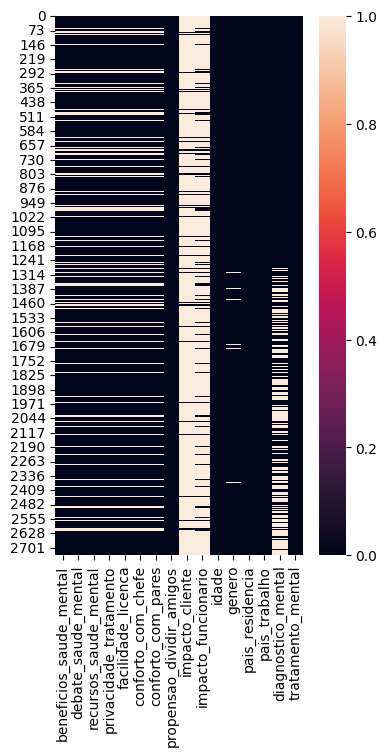

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,7))
sns.heatmap(osmi_df.isna())
plt.show()

Avaliando a quantidade de valores ausentes

> Menos que 5% ausentes: excluir direta provavelmente não terá impacto significativo.

> 5% - 30% ausentes: considerar métodos de imputação, como preenchimento com moda, mediana, ou categóricos como "Não informado".

> Maior que 30% ausentes: reavaliar a utilidade da coluna na análise; talvez seja melhor excluí-la.

In [24]:
print("Percentual de valores ausentes:")
percentual_ausentes = (osmi_df.isnull().sum() / len(osmi_df)) * 100
print(percentual_ausentes)


Percentual de valores ausentes:
beneficios_saude_mental     15.480102
debate_saude_mental         15.480102
recursos_saude_mental       15.480102
privacidade_tratamento      15.480102
facilidade_licenca          15.480102
conforto_com_chefe          15.480102
conforto_com_pares          15.480102
propensao_dividir_amigos     0.000000
impacto_cliente             92.844104
impacto_funcionario         84.519898
idade                        0.000000
genero                       0.730194
pais_residencia              0.000000
pais_trabalho                0.000000
diagnostico_mental          29.645856
tratamento_mental            0.000000
dtype: float64


Colunas com valores ausentes moderados (~15%)

> As colunas beneficios_saude_mental, debate_saude_mental, recursos_saude_mental, privacidade_tratamento, facilidade_licenca, conforto_com_chefe, conforto_com_pares têm ~15% de valores ausentes.

In [25]:
variaveis_categoricas = [
    'beneficios_saude_mental', 'debate_saude_mental',
    'recursos_saude_mental', 'privacidade_tratamento',
    'facilidade_licenca', 'conforto_com_chefe', 'conforto_com_pares'
]
osmi_df[variaveis_categoricas] = osmi_df[variaveis_categoricas].fillna('Não Informado')

Colunas com muitos valores ausentes (> 80%)

> As colunas impacto_cliente (92.8%) e impacto_funcionario (84.5%) têm um alto percentual de valores ausentes, o que torna a análise dessas colunas pouco confiável.

In [26]:
osmi_df.drop(columns=['impacto_cliente', 'impacto_funcionario'], inplace=True)

Colunas com valores ausentes baixos (< 1%)

> A coluna genero (0.73%) tem poucos valores ausentes.

In [27]:
osmi_df['genero'] = osmi_df['genero'].fillna('Não informado')

Coluna com valores ausentes moderados (~30%)

> A coluna diagnostico_mental (29.6%) possui um percentual maior de valores ausentes. Será preenchido com "Não informado" para evitar perda de dados.

In [28]:
osmi_df['diagnostico_mental'] = osmi_df['diagnostico_mental'].fillna('Não informado')

In [31]:
print("Verificando aquivo após modificações:")
osmi_df.info()

Verificando aquivo após modificações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   beneficios_saude_mental   2739 non-null   object 
 1   debate_saude_mental       2739 non-null   object 
 2   recursos_saude_mental     2739 non-null   object 
 3   privacidade_tratamento    2739 non-null   object 
 4   facilidade_licenca        2739 non-null   object 
 5   conforto_com_chefe        2739 non-null   object 
 6   conforto_com_pares        2739 non-null   object 
 7   propensao_dividir_amigos  2739 non-null   object 
 8   idade                     2739 non-null   float64
 9   genero                    2739 non-null   object 
 10  pais_residencia           2739 non-null   object 
 11  pais_trabalho             2739 non-null   object 
 12  diagnostico_mental        2739 non-null   object 
 13  tratamento_mental        

##### Padronizando colunas

Coluna: beneficios_saude_mental


Problema: respostas como "Nao elegivel" e "Nao elegivel - NA" podem ser agrupadas. Também há valores nulos (nan).

Colunas: debate_saude_mental, recursos_saude_mental, privacidade_tratamento

Problema: valores como "Eu nao sei" podem ser padronizados, e valores nulos tratados

Coluna: facilidade_licenca

Problema: muitas respostas com diferentes níveis de facilidade e valores nulos.

Colunas: conforto_com_chefe e conforto_com_pares

Problema: valores como "Talvez" podem ser mantidos ou simplificados.

Coluna: propensao_dividir_amigos

Problema: mistura de valores numéricos e descritivos.

A coluna gênero contém valores variados. Por isso, será padronizado.

##### Verificando idade

Garantindo que idade esteja dentro de um intervalo razoável.

In [29]:
# Verificando idades fora do padrão (<18 ou >100)
outliers_idade = cleaned_data[(cleaned_data['idade'] < 18) | (cleaned_data['idade'] > 100)]
print("Idades fora do padrão:")
print(outliers_idade)

# Removendo idades fora do padrão
cleaned_data = cleaned_data[(cleaned_data['idade'] >= 18) & (cleaned_data['idade'] <= 100)]


NameError: name 'cleaned_data' is not defined

##### Confirmando limpeza

In [ ]:
# Conferindo as primeiras linhas após limpeza
cleaned_data.head()

# Resumo do DataFrame após a limpeza
cleaned_data.info()


Verificando outras colunas

In [ ]:
print(cleaned_data.shape)
print(cleaned_data.info())

In [ ]:
print("beneficios_saude_mental")
cleaned_data['beneficios_saude_mental'].unique()


In [ ]:
print("debate_saude_mental")
cleaned_data['debate_saude_mental'].unique()



In [ ]:
print("\nrecursos_saude_mental ")
cleaned_data['recursos_saude_mental'].unique()


In [ ]:
print("\nprivacidade_tratamento")
cleaned_data['privacidade_tratamento'].unique()


In [ ]:
print("\nfacilidade_licenca")
cleaned_data['facilidade_licenca'].unique()


In [ ]:
print("\nconforto_com_chefe")
cleaned_data['conforto_com_chefe'].unique()


In [ ]:
print("\nconforto_com_pares")
cleaned_data['conforto_com_chefe'].unique()


In [ ]:
print("\npropensao_dividir_amigos")
cleaned_data['propensao_dividir_amigos'].unique()


In [ ]:
print("\npais_residencia")
cleaned_data['pais_residencia'].unique()


In [ ]:
print("\npais_trabalho")
cleaned_data['pais_trabalho'].unique()


In [ ]:
print("\ndiagnostico_mental")
cleaned_data['diagnostico_mental'].unique()


In [ ]:
print("\ntratamento_mental")
cleaned_data['tratamento_mental'].unique()